🚀 SIMULADOR AVANZADO DE CRONOGRAMAS CON DEPENDENCIAS REALISTAS
🎲 GENERANDO MÚLTIPLES SIMULACIONES

📊 Simulación 1/3
----------------------------------------
ID: SIM-1331
Perfil: Proyecto Normal
Red: Compleja
Completadas: 29 (58.0%)
En progreso: 8 (16.0%)
No iniciadas: 13 (26.0%)

📊 Simulación 2/3
----------------------------------------
ID: SIM-2971
Perfil: Proyecto Retrasado
Red: Mixta
Completadas: 18 (36.0%)
En progreso: 14 (28.0%)
No iniciadas: 18 (36.0%)

📊 Simulación 3/3
----------------------------------------
ID: SIM-2575
Perfil: Proyecto Inicial
Red: Mixta
Completadas: 7 (14.0%)
En progreso: 2 (4.0%)
No iniciadas: 41 (82.0%)

📊 RESUMEN FINAL

Simulación: SIM-1331
  Tipo de red: Compleja
  Total dependencias: 65
  Complejidad: Media

Simulación: SIM-2971
  Tipo de red: Mixta
  Total dependencias: 65
  Complejidad: Media

Simulación: SIM-2575
  Tipo de red: Mixta
  Total dependencias: 64
  Complejidad: Media

📁 EXPORTANDO A EXCEL...
-----------------------------------------------

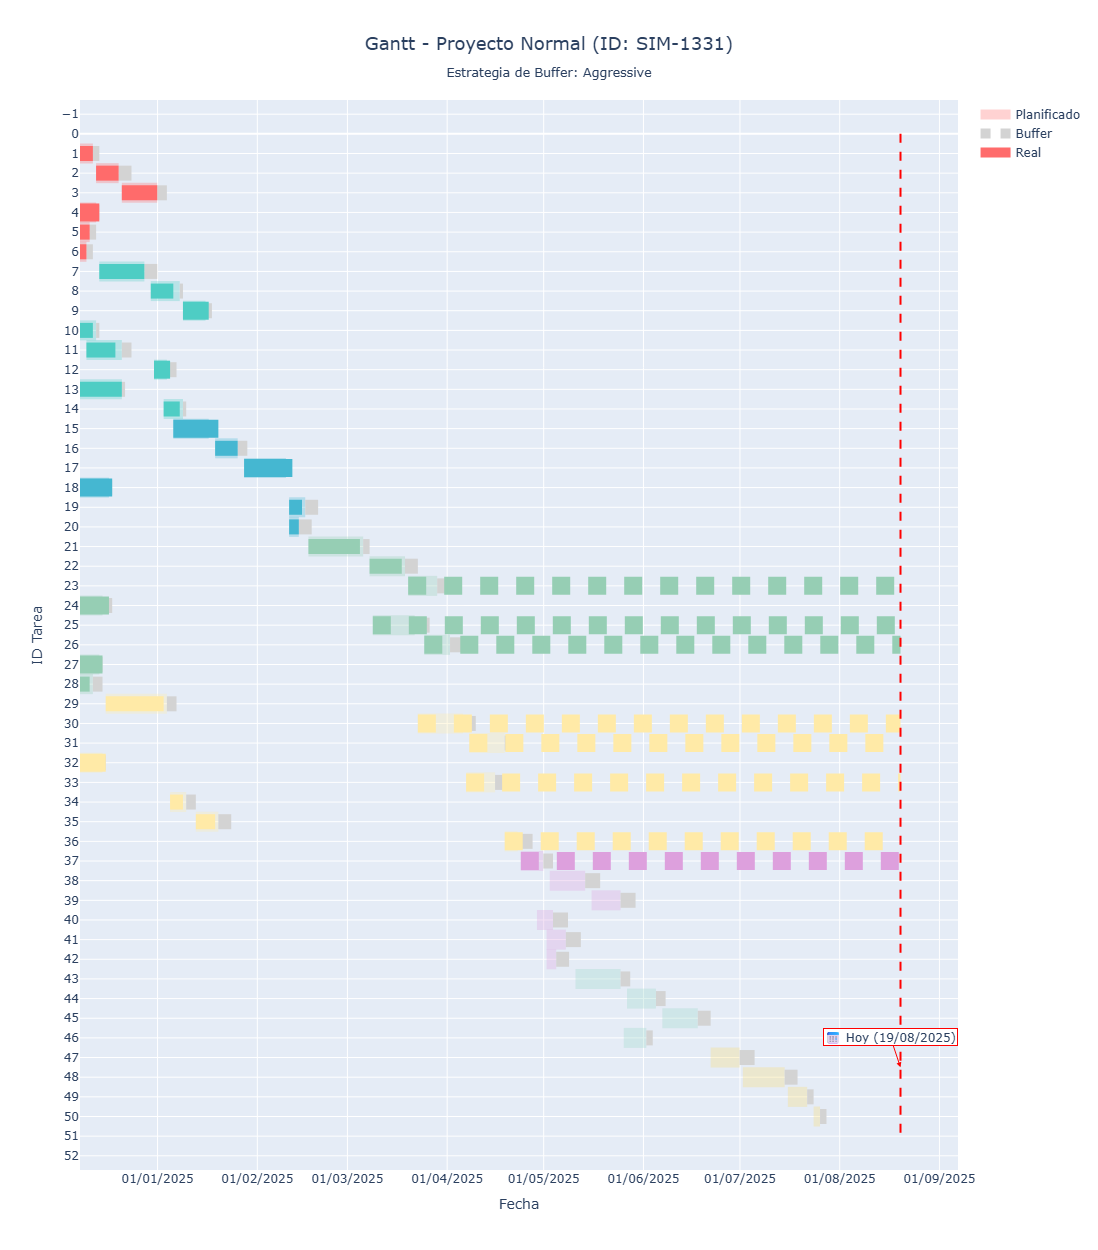

✅ Gantt mostrado para SIM-1331


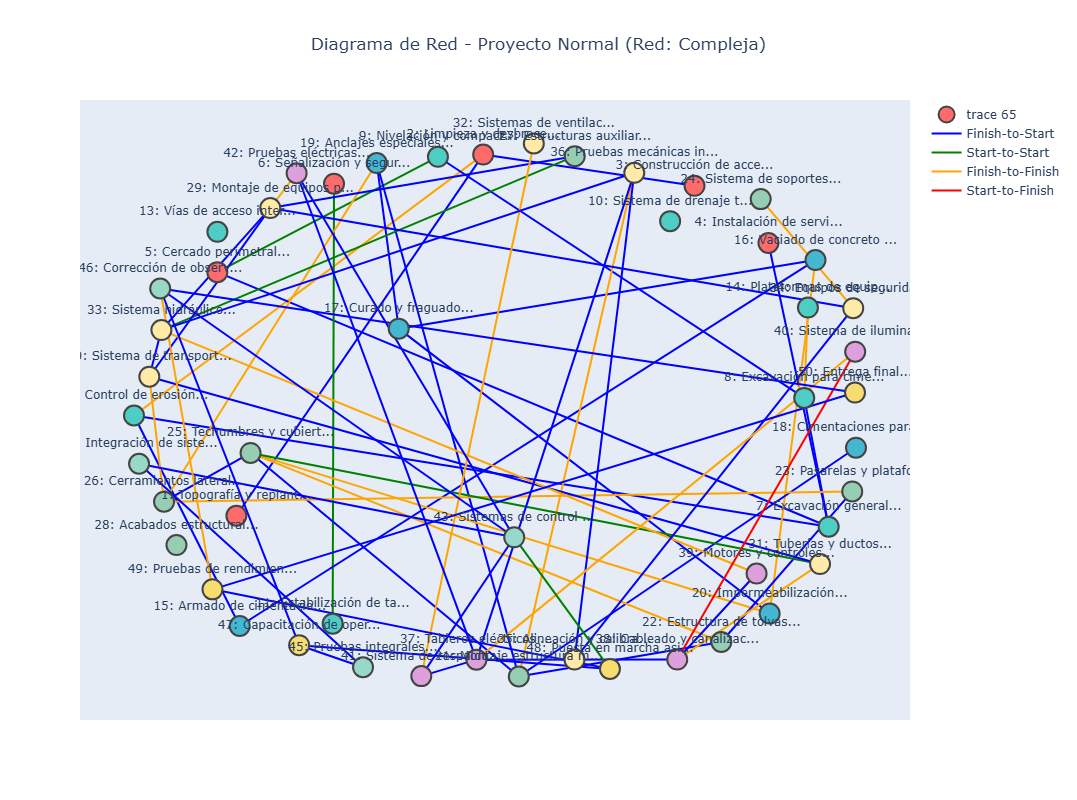

✅ Diagrama de red mostrado para SIM-1331


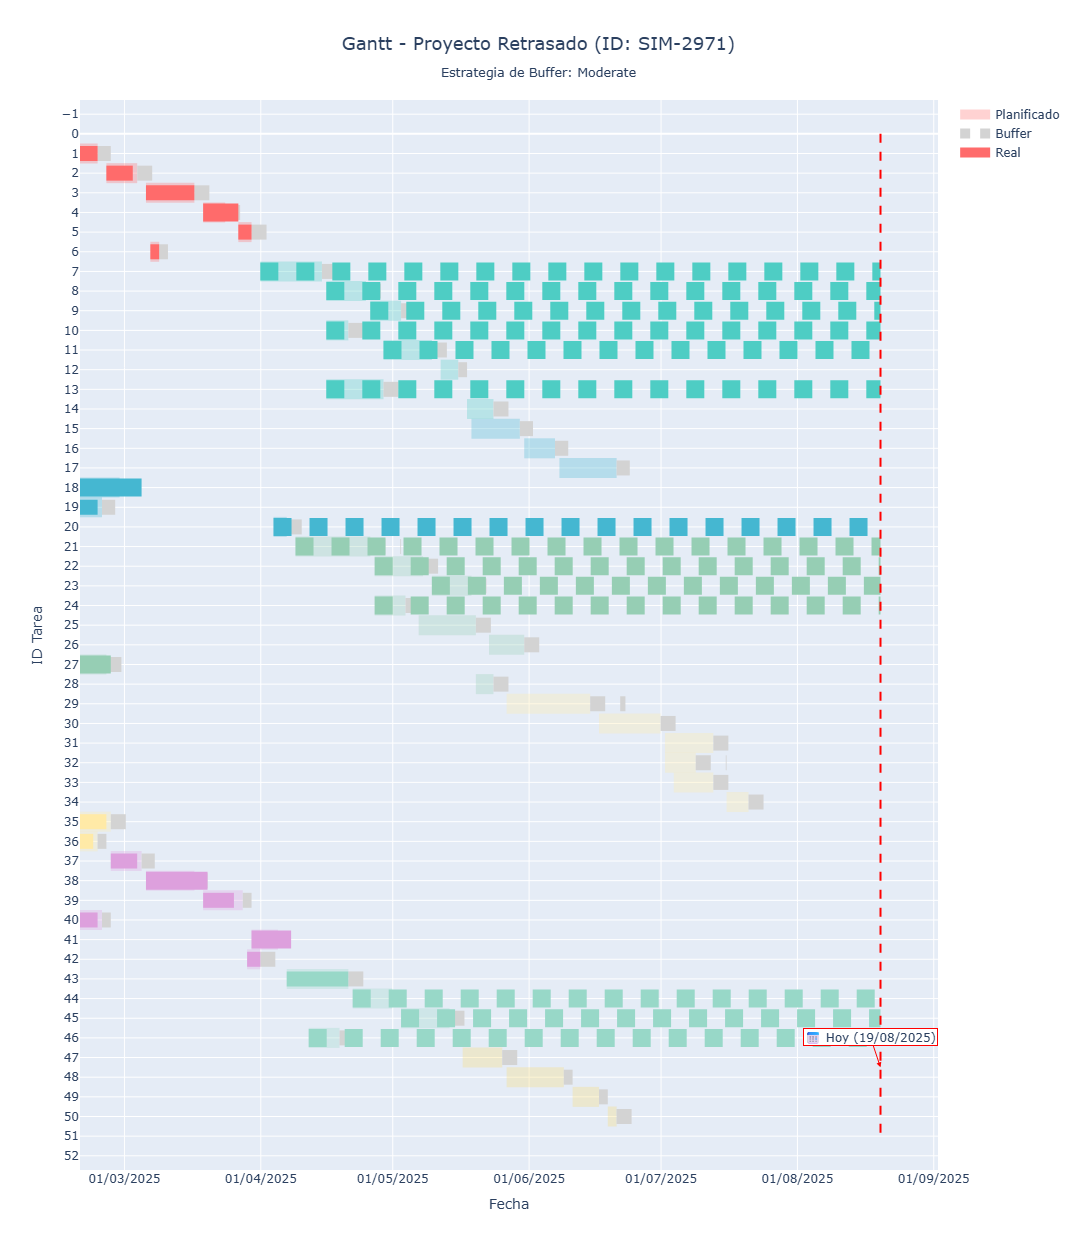

✅ Gantt mostrado para SIM-2971


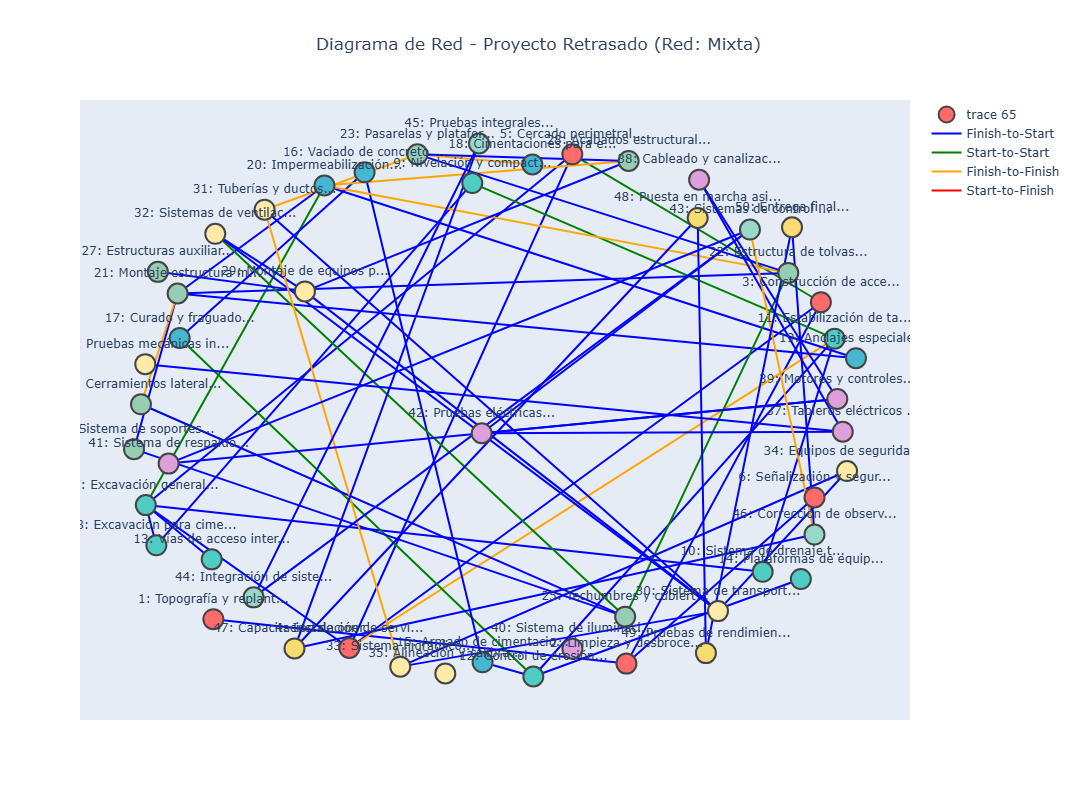

✅ Diagrama de red mostrado para SIM-2971


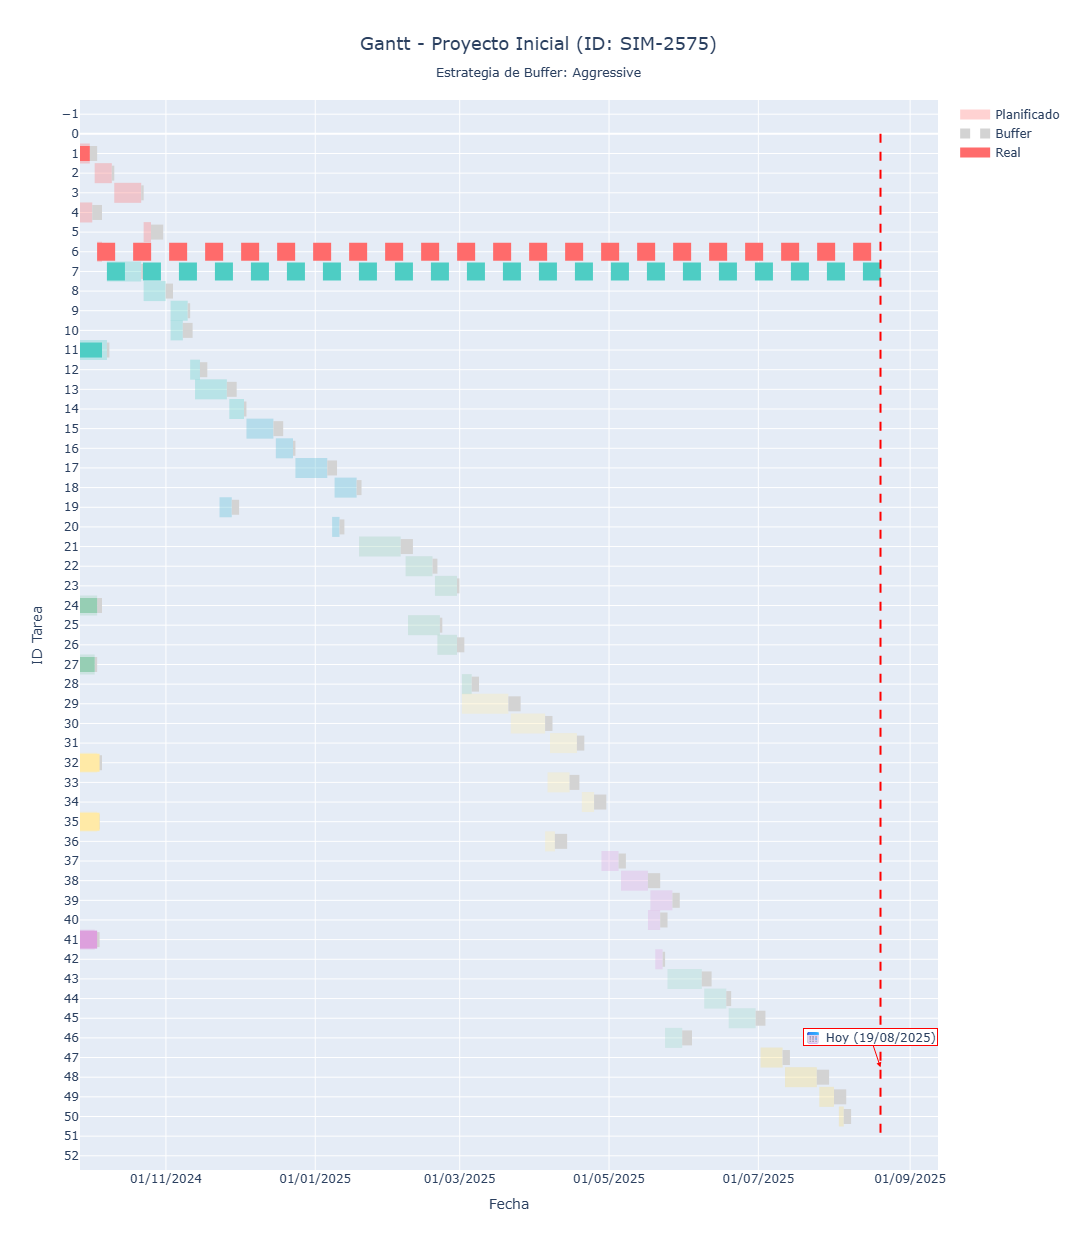

✅ Gantt mostrado para SIM-2575


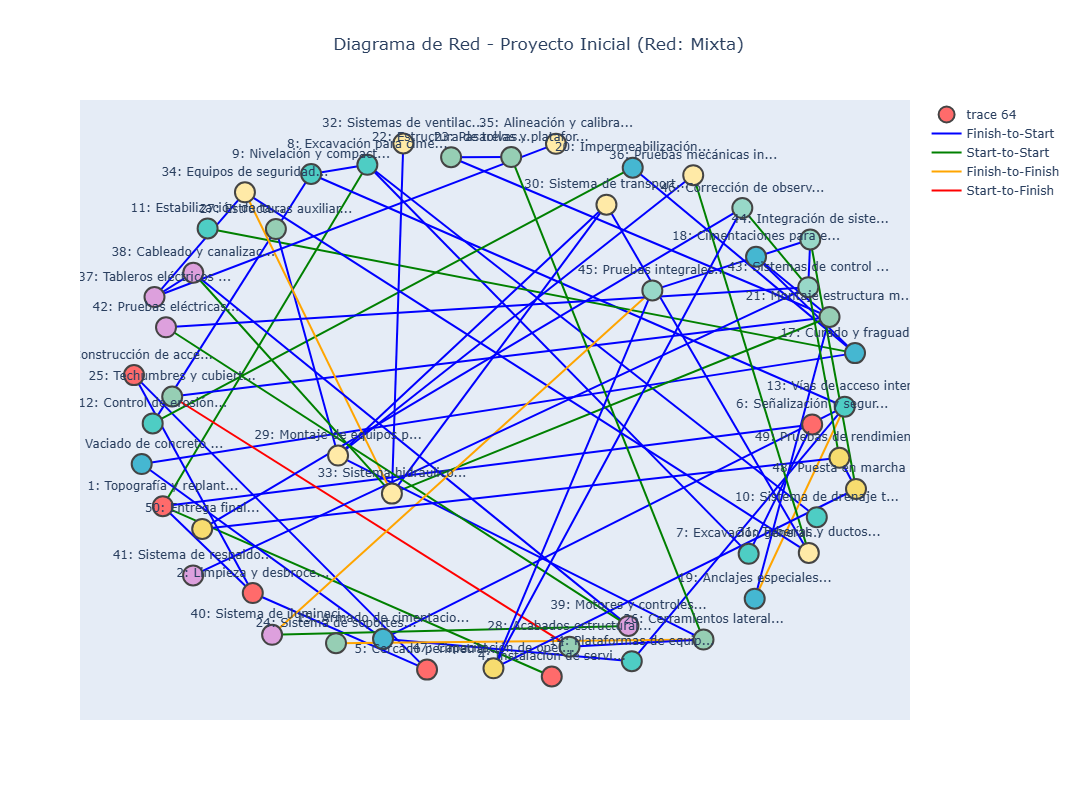

✅ Diagrama de red mostrado para SIM-2575


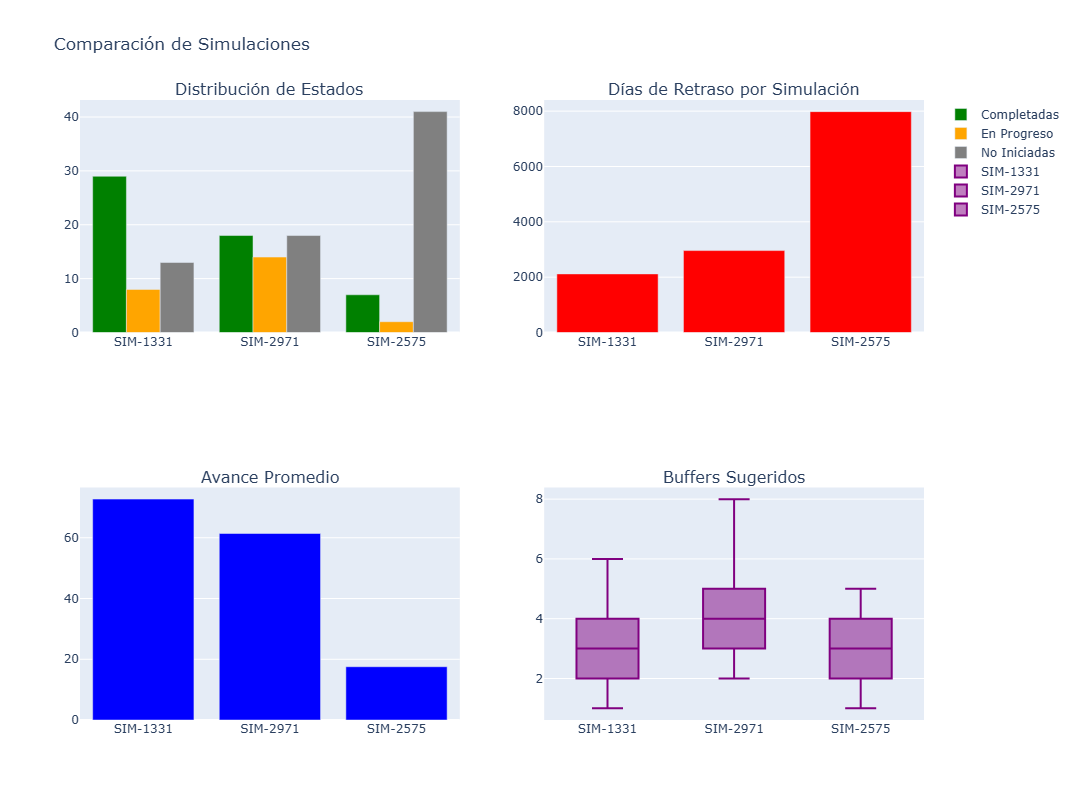

✅ Dashboard comparativo mostrado

🎉 SIMULACIÓN COMPLETADA


In [10]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
import networkx as nx
warnings.filterwarnings('ignore')
try:
    import plotly.graph_objects as go
    from plotly.subplots import make_subplots
    PLOTLY_AVAILABLE = True
except ImportError:
    PLOTLY_AVAILABLE = False
    print("⚠️ Plotly no está instalado. Las visualizaciones no estarán disponibles.")

class ImprovedMiningScheduler:
    def __init__(self, project_start_date=None, current_date=None, simulation_id=None):
        """
        Inicializa el simulador mejorado con múltiples simulaciones coherentes
        """
        self.simulation_id = simulation_id or f"SIM-{random.randint(1000, 9999)}"
        # Proyecto comienza entre 180 y 365 días antes de la fecha actual para proyectos más realistas
        self.project_start_date = project_start_date or datetime.now() - timedelta(days=random.randint(180, 365))
        self.current_date = current_date or datetime.now()
        self.tasks = []
        self.phases = [
            "Preparación del Terreno",
            "Movimiento de Tierra", 
            "Cimentaciones",
            "Estructuras Principales",
            "Instalaciones Mecánicas",
            "Instalaciones Eléctricas",
            "Acabados y Pruebas",
            "Puesta en Marcha"
        ]
        
        # Configuración aleatoria para esta simulación
        self.simulation_config = self._generate_simulation_config()
        
        # Factores de riesgo por fase
        self.phase_risk_factors = {
            "Preparación del Terreno": 0.15,
            "Movimiento de Tierra": 0.30,
            "Cimentaciones": 0.25,
            "Estructuras Principales": 0.20,
            "Instalaciones Mecánicas": 0.35,
            "Instalaciones Eléctricas": 0.25,
            "Acabados y Pruebas": 0.30,
            "Puesta en Marcha": 0.20
        }
        
        # Causas de retrasos
        self.delay_causes = [
            "Condiciones climáticas adversas",
            "Problemas de suministro de materiales", 
            "Fallas de equipos",
            "Cambios en especificaciones técnicas",
            "Problemas geotécnicos inesperados",
            "Retrasos en permisos regulatorios",
            "Conflictos laborales",
            "Problemas de acceso logístico"
        ]
        
        # Tipos de relaciones de precedencia
        self.dependency_types = ["FS", "SS", "FF", "SF"]
    
    def _generate_simulation_config(self):
        """
        Genera una configuración única para esta simulación
        """
        profiles = [
            {"name": "Proyecto Adelantado", "completed": (0.60, 0.80), "in_progress": (0.05, 0.15), "delay_factor": 0.1},
            {"name": "Proyecto Normal", "completed": (0.40, 0.60), "in_progress": (0.10, 0.20), "delay_factor": 0.2},
            {"name": "Proyecto Retrasado", "completed": (0.20, 0.40), "in_progress": (0.15, 0.30), "delay_factor": 0.4},
            {"name": "Proyecto Inicial", "completed": (0.05, 0.20), "in_progress": (0.05, 0.15), "delay_factor": 0.15},
            {"name": "Proyecto Crítico", "completed": (0.30, 0.45), "in_progress": (0.25, 0.35), "delay_factor": 0.5}
        ]
        
        profile = random.choice(profiles)
        
        completed_pct = random.uniform(*profile["completed"])
        in_progress_pct = random.uniform(*profile["in_progress"])
        not_started_pct = 1.0 - completed_pct - in_progress_pct
        
        if not_started_pct < 0:
            not_started_pct = 0.1
            total_active = 0.9
            completed_pct = random.uniform(0.3, 0.7) * total_active
            in_progress_pct = total_active - completed_pct
        
        # Configuración de red de dependencias
        network_styles = [
            {"name": "Paralela", "parallel_factor": 0.7, "max_predecessors": 3},
            {"name": "Secuencial", "parallel_factor": 0.3, "max_predecessors": 2},
            {"name": "Mixta", "parallel_factor": 0.5, "max_predecessors": 4},
            {"name": "Compleja", "parallel_factor": 0.6, "max_predecessors": 5}
        ]
        
        network_style = random.choice(network_styles)
        
        config = {
            'profile_name': profile["name"],
            'completed_percentage': completed_pct,
            'in_progress_percentage': in_progress_pct,
            'not_started_percentage': not_started_pct,
            'delay_factor': profile["delay_factor"],
            'buffer_strategy': random.choice(['conservative', 'moderate', 'aggressive']),
            'network_style': network_style["name"],
            'parallel_factor': network_style["parallel_factor"],
            'max_predecessors': network_style["max_predecessors"],
            'simulation_id': self.simulation_id
        }
        
        return config
    
    def _generate_realistic_predecessors(self, tasks_data):
        """
        Genera predecesores realistas con relaciones no lineales y múltiples tipos de dependencias
        """
        # Crear estructura de datos mejorada con relaciones complejas
        enhanced_tasks = []
        
        for i, task in enumerate(tasks_data):
            enhanced_task = task.copy()
            enhanced_task["id"] = i + 1
            enhanced_task["predecessors"] = []  # Lista de tuplas (task_id, type, lag)
            enhanced_tasks.append(enhanced_task)
        
        # Agrupar tareas por fase
        phase_tasks = {}
        for task in enhanced_tasks:
            if task["fase"] not in phase_tasks:
                phase_tasks[task["fase"]] = []
            phase_tasks[task["fase"]].append(task)
        
        # Establecer dependencias realistas
        for phase_idx, phase in enumerate(self.phases):
            if phase not in phase_tasks:
                continue
                
            tasks_in_phase = phase_tasks[phase]
            
            for task_idx, task in enumerate(tasks_in_phase):
                predecessors = []
                
                # Dependencias dentro de la misma fase
                if task_idx > 0:
                    # Las primeras tareas de cada fase deben ser más secuenciales
                    if task_idx <= 2:
                        # Las primeras tareas son más secuenciales
                        # La segunda tarea SIEMPRE depende de la primera
                        pred = tasks_in_phase[task_idx - 1]
                        dep_type = "FS"  # Finish-to-Start para asegurar secuencialidad
                        lag = random.randint(0, 1)
                        predecessors.append((pred["id"], dep_type, lag))
                    else:
                        # Tareas posteriores pueden tener más paralelismo
                        if random.random() < 0.7:  # 70% probabilidad de dependencia intra-fase
                            # Puede depender de una o múltiples tareas anteriores
                            num_deps = min(task_idx, random.randint(1, min(2, task_idx)))
                            possible_preds = tasks_in_phase[:task_idx]
                            selected_preds = random.sample(possible_preds, num_deps)
                            
                            for pred in selected_preds:
                                # Determinar tipo de relación
                                if random.random() < 0.7:
                                    dep_type = "FS"  # 70% Finish-to-Start
                                elif random.random() < 0.5:
                                    dep_type = "SS"  # 15% Start-to-Start
                                elif random.random() < 0.7:
                                    dep_type = "FF"  # 10% Finish-to-Finish
                                else:
                                    dep_type = "SF"  # 5% Start-to-Finish
                                
                                # Lag time (puede ser positivo o negativo)
                                if dep_type in ["SS", "FF"]:
                                    lag = random.randint(-2, 3)  # Puede solaparse
                                else:
                                    lag = random.randint(0, 2)  # Solo positivo para FS/SF
                                
                                predecessors.append((pred["id"], dep_type, lag))
                
                # Dependencias entre fases - CRÍTICO PARA SECUENCIALIDAD
                if phase_idx > 0:
                    prev_phase = self.phases[phase_idx - 1]
                    if prev_phase in phase_tasks:
                        prev_tasks = phase_tasks[prev_phase]
                        
                        # Primera tarea de la fase DEBE depender de la fase anterior
                        if task_idx == 0:
                            # Para fases finales (Puesta en Marcha), asegurar que dependa de TODAS las fases anteriores importantes
                            if phase == "Puesta en Marcha":
                                # Depender de las últimas tareas de Acabados y Pruebas
                                if "Acabados y Pruebas" in phase_tasks:
                                    critical_tasks = phase_tasks["Acabados y Pruebas"][-2:]  # Últimas 2 tareas
                                    for pred in critical_tasks:
                                        predecessors.append((pred["id"], "FS", random.randint(1, 3)))
                            elif phase == "Acabados y Pruebas":
                                # Depender de Instalaciones Eléctricas Y Mecánicas
                                if "Instalaciones Eléctricas" in phase_tasks:
                                    critical_tasks = phase_tasks["Instalaciones Eléctricas"][-2:]
                                    for pred in critical_tasks:
                                        predecessors.append((pred["id"], "FS", random.randint(1, 2)))
                            else:
                                # Para otras fases, seleccionar tareas críticas de la fase anterior
                                critical_tasks = prev_tasks[-min(3, len(prev_tasks)):]
                                num_deps = min(len(critical_tasks), random.randint(1, 2))
                                selected_preds = random.sample(critical_tasks, num_deps)
                                
                                for pred in selected_preds:
                                    dep_type = "FS"  # Siempre FS para dependencias entre fases
                                    lag = random.randint(0, 2)
                                    predecessors.append((pred["id"], dep_type, lag))
                        
                        # Otras tareas pueden tener dependencias cruzadas con fase anterior
                        elif random.random() < self.simulation_config['parallel_factor']:
                            # Posibilidad de trabajo en paralelo entre fases
                            num_cross_deps = min(len(prev_tasks), random.randint(0, 1))
                            if num_cross_deps > 0:
                                selected_preds = random.sample(prev_tasks, num_cross_deps)
                                for pred in selected_preds:
                                    dep_type = random.choice(["SS", "FF"])  # Permitir paralelismo
                                    lag = random.randint(1, 5)
                                    predecessors.append((pred["id"], dep_type, lag))
                
                # ESPECIAL: La última tarea "Entrega final" debe depender de TODAS las tareas críticas anteriores
                if task["tarea"] == "Entrega final":
                    # Limpiar predecesores anteriores
                    predecessors = []
                    # Depender de las pruebas de rendimiento (tarea anterior)
                    if task_idx > 0:
                        predecessors.append((task["id"] - 1, "FS", 1))  # Pruebas de rendimiento
                    # También depender de las últimas tareas de Acabados y Pruebas
                    if "Acabados y Pruebas" in phase_tasks:
                        last_task = phase_tasks["Acabados y Pruebas"][-1]
                        predecessors.append((last_task["id"], "FS", 0))
                
                # Limitar número máximo de predecesores
                if len(predecessors) > self.simulation_config['max_predecessors']:
                    # Para tareas críticas (últimas de cada fase), mantener las dependencias FS
                    fs_deps = [p for p in predecessors if p[1] == "FS"]
                    other_deps = [p for p in predecessors if p[1] != "FS"]
                    
                    if len(fs_deps) <= self.simulation_config['max_predecessors']:
                        predecessors = fs_deps + other_deps[:self.simulation_config['max_predecessors'] - len(fs_deps)]
                    else:
                        predecessors = random.sample(predecessors, self.simulation_config['max_predecessors'])
                
                task["predecessors"] = predecessors
        
        # Verificar y eliminar ciclos
        self._remove_cycles(enhanced_tasks)
        
        return enhanced_tasks
    
    def _remove_cycles(self, tasks):
        """
        Detecta y elimina ciclos en la red de dependencias usando DFS
        """
        def has_cycle_util(task_id, visited, rec_stack, task_dict):
            visited[task_id] = True
            rec_stack[task_id] = True
            
            task = task_dict[task_id]
            for pred_id, _, _ in task["predecessors"]:
                if not visited[pred_id]:
                    if has_cycle_util(pred_id, visited, rec_stack, task_dict):
                        return True
                elif rec_stack[pred_id]:
                    return True
            
            rec_stack[task_id] = False
            return False
        
        # Crear diccionario para búsqueda rápida
        task_dict = {task["id"]: task for task in tasks}
        
        # Verificar ciclos y eliminarlos
        for task in tasks:
            visited = {t["id"]: False for t in tasks}
            rec_stack = {t["id"]: False for t in tasks}
            
            if has_cycle_util(task["id"], visited, rec_stack, task_dict):
                # Si hay ciclo, eliminar la dependencia más reciente
                if task["predecessors"]:
                    task["predecessors"].pop()
    
    def _calculate_task_dates(self, task, enhanced_tasks):
        """
        Calcula las fechas de inicio y fin basándose en los predecesores y sus tipos de relación
        """
        if not task["predecessors"]:
            # Si no tiene predecesores, comienza en la fecha de inicio del proyecto
            # La fecha de fin es inicio + duración - 1 (porque el día de inicio cuenta)
            return self.project_start_date, self.project_start_date + timedelta(days=task["duracion"] - 1)
        
        latest_constraint = self.project_start_date
        
        for pred_id, dep_type, lag in task["predecessors"]:
            pred_task = next(t for t in enhanced_tasks if t["id"] == pred_id)
            
            if "calculated_start" not in pred_task:
                # Calcular recursivamente si no se ha calculado aún
                pred_start, pred_end = self._calculate_task_dates(pred_task, enhanced_tasks)
                pred_task["calculated_start"] = pred_start
                pred_task["calculated_end"] = pred_end
            
            pred_start = pred_task["calculated_start"]
            pred_end = pred_task["calculated_end"]
            
            # Calcular restricción según tipo de dependencia
            if dep_type == "FS":  # Finish-to-Start
                # La tarea comienza después de que termine el predecesor + lag
                constraint_date = pred_end + timedelta(days=lag + 1)
            elif dep_type == "SS":  # Start-to-Start
                # La tarea comienza lag días después del inicio del predecesor
                constraint_date = pred_start + timedelta(days=lag)
            elif dep_type == "FF":  # Finish-to-Finish
                # La tarea debe terminar lag días después que el predecesor
                # Por lo tanto, debe comenzar para cumplir esta restricción
                constraint_date = pred_end + timedelta(days=lag + 1) - timedelta(days=task["duracion"])
            elif dep_type == "SF":  # Start-to-Finish
                # El inicio del predecesor determina el fin de esta tarea
                constraint_date = pred_start + timedelta(days=lag + 1) - timedelta(days=task["duracion"])
            
            latest_constraint = max(latest_constraint, constraint_date)
        
        task_start = latest_constraint
        # La fecha de fin es inicio + duración - 1 (porque el día de inicio cuenta)
        task_end = task_start + timedelta(days=task["duracion"] - 1)
        
        return task_start, task_end
    
    def calculate_delay_days(self, task):
        """
        Calcula los días de retraso acumulados para una tarea
        """
        if task["Estado"] == "No iniciada":
            if isinstance(task["Inicio Planificado"], datetime) and task["Inicio Planificado"] < self.current_date:
                return (self.current_date - task["Inicio Planificado"]).days
            else:
                return 0
        
        elif "En progreso" in task["Estado"]:
            if isinstance(task["Fin Planificado"], datetime) and task["Fin Planificado"] < self.current_date:
                return (self.current_date - task["Fin Planificado"]).days
            else:
                if isinstance(task["Inicio Planificado"], datetime):
                    days_since_start = (self.current_date - task["Inicio Planificado"]).days
                    expected_progress = min(100, (days_since_start / task["Duración Planificada (días)"]) * 100)
                    actual_progress = task["% Avance Físico"]
                    if expected_progress > actual_progress:
                        progress_delay = ((expected_progress - actual_progress) / 100) * task["Duración Planificada (días)"]
                        return int(progress_delay)
                return 0
        
        elif "Completada" in task["Estado"]:
            if task.get("Retraso (días)", 0) > 0:
                return task["Retraso (días)"]
            else:
                return 0
        
        return 0
    
    def calculate_buffer_days(self, task):
        """
        Calcula el buffer sugerido para una tarea basado en múltiples factores
        """
        base_duration = task["Duración Planificada (días)"]
        risk_factor = self.phase_risk_factors.get(task["Fase"], 0.2)
        
        if self.simulation_config['buffer_strategy'] == 'conservative':
            buffer_multiplier = 0.3
            min_buffer = 3
        elif self.simulation_config['buffer_strategy'] == 'moderate':
            buffer_multiplier = 0.2
            min_buffer = 2
        else:  # aggressive
            buffer_multiplier = 0.1
            min_buffer = 1
        
        base_buffer = max(min_buffer, int(base_duration * buffer_multiplier))
        risk_adjustment = int(base_buffer * risk_factor)
        
        if task["Estado"] == "No iniciada":
            state_adjustment = 0
        elif "En progreso" in task["Estado"] and "retraso" in task["Estado"]:
            state_adjustment = int(base_buffer * 0.5)
        elif "En progreso" in task["Estado"]:
            state_adjustment = int(base_buffer * 0.2)
        else:
            state_adjustment = 0
        
        # Ajuste adicional por número de predecesores (complejidad)
        pred_count = len(task.get("Predecesores Detallados", []))
        complexity_adjustment = min(pred_count, 3)  # Máximo 3 días extra por complejidad
        
        total_buffer = base_buffer + risk_adjustment + state_adjustment + complexity_adjustment
        variability = random.randint(-1, 2)
        
        return max(min_buffer, total_buffer + variability)
    
    def generate_coherent_tasks(self):
        """
        Genera tareas con estados coherentes y lógicos
        """
        tasks_data = [
            # Fase 1: Preparación del Terreno (6 tareas)
            {"fase": "Preparación del Terreno", "tarea": "Topografía y replanteo", "duracion": 5, "costo_base": 15000},
            {"fase": "Preparación del Terreno", "tarea": "Limpieza y desbroce", "duracion": 8, "costo_base": 25000},
            {"fase": "Preparación del Terreno", "tarea": "Construcción de accesos temporales", "duracion": 12, "costo_base": 45000},
            {"fase": "Preparación del Terreno", "tarea": "Instalación de servicios temporales", "duracion": 6, "costo_base": 20000},
            {"fase": "Preparación del Terreno", "tarea": "Cercado perimetral", "duracion": 4, "costo_base": 12000},
            {"fase": "Preparación del Terreno", "tarea": "Señalización y seguridad", "duracion": 3, "costo_base": 8000},
            
            # Fase 2: Movimiento de Tierra (8 tareas)
            {"fase": "Movimiento de Tierra", "tarea": "Excavación general", "duracion": 15, "costo_base": 120000},
            {"fase": "Movimiento de Tierra", "tarea": "Excavación para cimentaciones", "duracion": 10, "costo_base": 75000},
            {"fase": "Movimiento de Tierra", "tarea": "Nivelación y compactación", "duracion": 8, "costo_base": 40000},
            {"fase": "Movimiento de Tierra", "tarea": "Sistema de drenaje temporal", "duracion": 6, "costo_base": 30000},
            {"fase": "Movimiento de Tierra", "tarea": "Estabilización de taludes", "duracion": 12, "costo_base": 85000},
            {"fase": "Movimiento de Tierra", "tarea": "Control de erosión", "duracion": 5, "costo_base": 18000},
            {"fase": "Movimiento de Tierra", "tarea": "Vías de acceso internas", "duracion": 14, "costo_base": 95000},
            {"fase": "Movimiento de Tierra", "tarea": "Plataformas de equipos", "duracion": 7, "costo_base": 35000},
            
            # Fase 3: Cimentaciones (6 tareas)
            {"fase": "Cimentaciones", "tarea": "Armado de cimentaciones principales", "duracion": 12, "costo_base": 180000},
            {"fase": "Cimentaciones", "tarea": "Vaciado de concreto cimentaciones", "duracion": 8, "costo_base": 220000},
            {"fase": "Cimentaciones", "tarea": "Curado y fraguado", "duracion": 14, "costo_base": 15000},
            {"fase": "Cimentaciones", "tarea": "Cimentaciones para equipos", "duracion": 10, "costo_base": 95000},
            {"fase": "Cimentaciones", "tarea": "Anclajes especiales", "duracion": 6, "costo_base": 45000},
            {"fase": "Cimentaciones", "tarea": "Impermeabilización", "duracion": 4, "costo_base": 25000},
            
            # Fase 4: Estructuras Principales (8 tareas)
            {"fase": "Estructuras Principales", "tarea": "Montaje estructura metálica principal", "duracion": 18, "costo_base": 450000},
            {"fase": "Estructuras Principales", "tarea": "Estructura de tolvas", "duracion": 12, "costo_base": 280000},
            {"fase": "Estructuras Principales", "tarea": "Pasarelas y plataformas", "duracion": 10, "costo_base": 125000},
            {"fase": "Estructuras Principales", "tarea": "Sistema de soportes", "duracion": 8, "costo_base": 85000},
            {"fase": "Estructuras Principales", "tarea": "Techumbres y cubiertas", "duracion": 14, "costo_base": 165000},
            {"fase": "Estructuras Principales", "tarea": "Cerramientos laterales", "duracion": 9, "costo_base": 95000},
            {"fase": "Estructuras Principales", "tarea": "Estructuras auxiliares", "duracion": 7, "costo_base": 55000},
            {"fase": "Estructuras Principales", "tarea": "Acabados estructurales", "duracion": 5, "costo_base": 35000},
            
            # Fase 5: Instalaciones Mecánicas (8 tareas)
            {"fase": "Instalaciones Mecánicas", "tarea": "Montaje de equipos principales", "duracion": 20, "costo_base": 850000},
            {"fase": "Instalaciones Mecánicas", "tarea": "Sistema de transporte de material", "duracion": 15, "costo_base": 320000},
            {"fase": "Instalaciones Mecánicas", "tarea": "Tuberías y ductos", "duracion": 12, "costo_base": 180000},
            {"fase": "Instalaciones Mecánicas", "tarea": "Sistemas de ventilación", "duracion": 8, "costo_base": 95000},
            {"fase": "Instalaciones Mecánicas", "tarea": "Sistema hidráulico", "duracion": 10, "costo_base": 145000},
            {"fase": "Instalaciones Mecánicas", "tarea": "Equipos de seguridad mecánica", "duracion": 6, "costo_base": 75000},
            {"fase": "Instalaciones Mecánicas", "tarea": "Alineación y calibración", "duracion": 8, "costo_base": 55000},
            {"fase": "Instalaciones Mecánicas", "tarea": "Pruebas mecánicas iniciales", "duracion": 5, "costo_base": 25000},
            
            # Fase 6: Instalaciones Eléctricas (6 tareas)
            {"fase": "Instalaciones Eléctricas", "tarea": "Tableros eléctricos principales", "duracion": 8, "costo_base": 125000},
            {"fase": "Instalaciones Eléctricas", "tarea": "Cableado y canalizaciones", "duracion": 12, "costo_base": 185000},
            {"fase": "Instalaciones Eléctricas", "tarea": "Motores y controles", "duracion": 10, "costo_base": 245000},
            {"fase": "Instalaciones Eléctricas", "tarea": "Sistema de iluminación", "duracion": 6, "costo_base": 45000},
            {"fase": "Instalaciones Eléctricas", "tarea": "Sistema de respaldo", "duracion": 7, "costo_base": 95000},
            {"fase": "Instalaciones Eléctricas", "tarea": "Pruebas eléctricas", "duracion": 4, "costo_base": 18000},
            
            # Fase 7: Acabados y Pruebas (4 tareas)
            {"fase": "Acabados y Pruebas", "tarea": "Sistemas de control y automatización", "duracion": 15, "costo_base": 385000},
            {"fase": "Acabados y Pruebas", "tarea": "Integración de sistemas", "duracion": 10, "costo_base": 125000},
            {"fase": "Acabados y Pruebas", "tarea": "Pruebas integrales", "duracion": 12, "costo_base": 85000},
            {"fase": "Acabados y Pruebas", "tarea": "Corrección de observaciones", "duracion": 8, "costo_base": 45000},
            
            # Fase 8: Puesta en Marcha (4 tareas)
            {"fase": "Puesta en Marcha", "tarea": "Capacitación de operadores", "duracion": 10, "costo_base": 55000},
            {"fase": "Puesta en Marcha", "tarea": "Puesta en marcha asistida", "duracion": 14, "costo_base": 95000},
            {"fase": "Puesta en Marcha", "tarea": "Pruebas de rendimiento", "duracion": 7, "costo_base": 35000},
            {"fase": "Puesta en Marcha", "tarea": "Entrega final", "duracion": 3, "costo_base": 15000}
        ]
        
        # Generar predecesores realistas
        enhanced_tasks = self._generate_realistic_predecessors(tasks_data)
        
        # Calcular fechas para todas las tareas
        for task in enhanced_tasks:
            if "calculated_start" not in task:
                start, end = self._calculate_task_dates(task, enhanced_tasks)
                task["calculated_start"] = start
                task["calculated_end"] = end
        
        # Calcular cuántas tareas de cada tipo necesitamos
        total_tasks = len(enhanced_tasks)
        target_completed = int(total_tasks * self.simulation_config['completed_percentage'])
        target_in_progress = int(total_tasks * self.simulation_config['in_progress_percentage'])
        target_not_started = total_tasks - target_completed - target_in_progress
        
        # Asignar estados de manera coherente (respetando predecesores)
        task_states = self._assign_coherent_states(enhanced_tasks, target_completed, target_in_progress)
        
        # Generar tareas con estados coherentes
        for i, task_data in enumerate(enhanced_tasks):
            task_id = task_data["id"]
            assigned_state = task_states[i]
            
            # Formatear predecesores para mostrar (solo IDs, sin tipos ni lag)
            pred_display = []
            pred_details = []  # Mantenemos esta lista para uso interno
            for pred_id, dep_type, lag in task_data["predecessors"]:
                pred_display.append(f"{pred_id}")
                lag_str = f"+{lag}" if lag > 0 else f"{lag}" if lag < 0 else ""
                pred_details.append(f"{pred_id}{dep_type}{lag_str}")
            
            # Fechas planificadas
            planned_start = task_data["calculated_start"]
            planned_end = task_data["calculated_end"]
            
            # Crear estado según asignación coherente
            task_status = self._create_coherent_status(
                assigned_state, planned_start, planned_end, 
                task_data["duracion"], task_data["costo_base"], task_data["fase"]
            )
            
            task = {
                "ID": task_id,
                "Fase": task_data["fase"],
                "Tarea": task_data["tarea"],
                "Duración Planificada (días)": task_data["duracion"],
                "Inicio Planificado": planned_start,
                "Fin Planificado": planned_end,
                "Predecesor": ", ".join(pred_display) if pred_display else "-",
                # Guardamos los detalles técnicos solo para uso interno (visualizaciones)
                "Predecesores Detallados": task_data["predecessors"],
                "Costo Planificado (USD)": task_data["costo_base"],
                "Riesgo de Retraso (%)": int(self.phase_risk_factors[task_data["fase"]] * 100),
                **task_status
            }
            
            # Calcular las nuevas columnas
            task["Días de Retraso"] = self.calculate_delay_days(task)
            task["Buffer sugerido (días)"] = self.calculate_buffer_days(task)
            
            self.tasks.append(task)
    
    def _assign_coherent_states(self, tasks_data, target_completed, target_in_progress):
        """
        Asigna estados de manera coherente respetando dependencias complejas
        """
        total_tasks = len(tasks_data)
        states = ['not_started'] * total_tasks
        
        # Crear mapa de índices
        id_to_idx = {task["id"]: i for i, task in enumerate(tasks_data)}
        
        # Función auxiliar para verificar si todos los predecesores necesarios están completados
        def can_complete(task_idx):
            task = tasks_data[task_idx]
            for pred_id, dep_type, _ in task["predecessors"]:
                pred_idx = id_to_idx[pred_id]
                if dep_type in ["FS", "SF"]:  # Requiere que el predecesor esté completado
                    if states[pred_idx] != 'completed':
                        return False
                elif dep_type in ["SS", "FF"]:  # Puede trabajar en paralelo
                    if states[pred_idx] == 'not_started':
                        return False
            return True
        
        def can_start(task_idx):
            task = tasks_data[task_idx]
            for pred_id, dep_type, _ in task["predecessors"]:
                pred_idx = id_to_idx[pred_id]
                if dep_type == "FS":  # Finish-to-Start: predecesor debe estar completado
                    if states[pred_idx] == 'not_started':
                        return False
                elif dep_type == "SS":  # Start-to-Start: predecesor debe haber iniciado
                    if states[pred_idx] == 'not_started':
                        return False
                elif dep_type == "FF":  # Finish-to-Finish: puede iniciar si predecesor inició
                    if states[pred_idx] == 'not_started':
                        return False
                elif dep_type == "SF":  # Start-to-Finish: puede iniciar independientemente
                    pass  # No hay restricción para iniciar
            return True
        
        # Primero, marcar tareas completadas (respetando dependencias)
        completed_count = 0
        attempts = 0
        max_attempts = total_tasks * 2
        
        while completed_count < target_completed and attempts < max_attempts:
            attempts += 1
            candidates = []
            
            for i in range(total_tasks):
                if states[i] == 'not_started' and can_complete(i):
                    candidates.append(i)
            
            if candidates:
                # Priorizar tareas más tempranas o con menos dependientes
                task_to_complete = random.choice(candidates)
                states[task_to_complete] = 'completed'
                completed_count += 1
            else:
                # Si no hay candidatos válidos, completar alguna tarea en progreso
                in_progress_indices = [i for i, s in enumerate(states) if s == 'in_progress']
                if in_progress_indices:
                    task_to_complete = random.choice(in_progress_indices)
                    states[task_to_complete] = 'completed'
                    completed_count += 1
                else:
                    break
        
        # Luego, marcar tareas en progreso
        in_progress_count = 0
        attempts = 0
        
        while in_progress_count < target_in_progress and attempts < max_attempts:
            attempts += 1
            candidates = []
            
            for i in range(total_tasks):
                if states[i] == 'not_started' and can_start(i):
                    candidates.append(i)
            
            if candidates:
                task_to_start = random.choice(candidates)
                states[task_to_start] = 'in_progress'
                in_progress_count += 1
            else:
                break
        
        return states
    
    def _create_coherent_status(self, state, start_date, planned_end, duration, cost, phase):
        """
        Crea un estado coherente para la tarea
        """
        if state == 'completed':
            # Variaciones para tareas completadas
            variation = random.choice(['on_time', 'early', 'delayed'])
            
            if variation == 'early':
                days_early = random.randint(1, max(1, duration // 5))
                real_end = planned_end - timedelta(days=days_early)
                real_duration = duration - days_early
                cost_variation = random.uniform(0.9, 1.0)
                
                return {
                    "Estado": "Completada anticipadamente",
                    "Inicio Real": start_date,
                    "Fin Real": real_end,
                    "Duración Real (días)": real_duration,
                    "% Avance Físico": 100,
                    "Costo Real (USD)": int(cost * cost_variation),
                    "Retraso (días)": -days_early,
                    "Sobrecosto (USD)": int(cost * (cost_variation - 1)),
                    "Causa de Retraso": "N/A",
                    "Observaciones": f"Completada {days_early} días antes"
                }
                
            elif variation == 'delayed':
                delay_days = int(duration * self.simulation_config['delay_factor'] * random.uniform(0.5, 1.5))
                real_end = planned_end + timedelta(days=delay_days)
                real_duration = duration + delay_days
                cost_overrun = delay_days * (cost / duration) * 0.3
                
                return {
                    "Estado": "Completada con retraso",
                    "Inicio Real": start_date,
                    "Fin Real": real_end,
                    "Duración Real (días)": real_duration,
                    "% Avance Físico": 100,
                    "Costo Real (USD)": int(cost + cost_overrun),
                    "Retraso (días)": delay_days,
                    "Sobrecosto (USD)": int(cost_overrun),
                    "Causa de Retraso": random.choice(self.delay_causes),
                    "Observaciones": f"Retraso de {delay_days} días"
                }
            
            else:  # on_time
                cost_variation = random.uniform(0.95, 1.05)
                return {
                    "Estado": "Completada",
                    "Inicio Real": start_date,
                    "Fin Real": planned_end,
                    "Duración Real (días)": duration,
                    "% Avance Físico": 100,
                    "Costo Real (USD)": int(cost * cost_variation),
                    "Retraso (días)": 0,
                    "Sobrecosto (USD)": int(cost * (cost_variation - 1)),
                    "Causa de Retraso": "N/A",
                    "Observaciones": "Completada según plan"
                }
        
        elif state == 'in_progress':
            # Calcular progreso basado en tiempo transcurrido
            days_since_start = max(0, (self.current_date - start_date).days)
            expected_progress = min(100, (days_since_start / duration) * 100)
            
            # Añadir variación al progreso
            progress_variation = random.uniform(-0.2, 0.1)
            actual_progress = max(5, min(95, expected_progress + expected_progress * progress_variation))
            
            # Determinar si hay retraso
            if actual_progress < expected_progress - 10:
                status = "En progreso (con retraso)"
                delay_cause = random.choice(self.delay_causes)
                obs = f"Progreso menor al esperado"
            elif actual_progress > expected_progress + 5:
                status = "En progreso (adelantada)"
                delay_cause = "N/A"
                obs = f"Progreso adelantado"
            else:
                status = "En progreso"
                delay_cause = "N/A"
                obs = "Avance según lo planificado"
            
            cost_to_date = int(cost * (actual_progress / 100))
            
            return {
                "Estado": status,
                "Inicio Real": start_date,
                "Fin Real": "En ejecución",
                "Duración Real (días)": f"~{duration} (estimado)",
                "% Avance Físico": int(actual_progress),
                "Costo Real (USD)": cost_to_date,
                "Retraso (días)": 0,  # Se calculará después
                "Sobrecosto (USD)": 0,
                "Causa de Retraso": delay_cause,
                "Observaciones": obs
            }
        
        else:  # not_started
            return {
                "Estado": "No iniciada",
                "Inicio Real": "Pendiente",
                "Fin Real": "Pendiente",
                "Duración Real (días)": "Pendiente",
                "% Avance Físico": 0,
                "Costo Real (USD)": "Pendiente",
                "Retraso (días)": 0,  # Se calculará después
                "Sobrecosto (USD)": "N/A",
                "Causa de Retraso": "N/A",
                "Observaciones": "Esperando inicio"
            }
    
    def create_dataframe(self):
        """Convierte la lista de tareas a DataFrame"""
        return pd.DataFrame(self.tasks)
    
    def create_network_diagram(self):
        """
        Crea un diagrama de red que muestra las relaciones entre tareas
        """
        try:
            import networkx as nx
        except ImportError:
            print("⚠️ NetworkX no está instalado. Instala con: pip install networkx")
            return None
        
        df = self.create_dataframe()
        
        # Crear grafo dirigido
        G = nx.DiGraph()
        
        # Añadir nodos
        for _, row in df.iterrows():
            G.add_node(row['ID'], 
                      label=f"{row['ID']}: {row['Tarea'][:20]}...",
                      phase=row['Fase'],
                      status=row['Estado'])
        
        # Añadir aristas basadas en predecesores
        edge_colors = {
            'FS': 'blue',    # Finish-to-Start
            'SS': 'green',   # Start-to-Start
            'FF': 'orange',  # Finish-to-Finish
            'SF': 'red'      # Start-to-Finish
        }
        
        for _, row in df.iterrows():
            if row['Predecesores Detallados']:
                for pred_id, dep_type, lag in row['Predecesores Detallados']:
                    G.add_edge(pred_id, row['ID'], 
                              type=dep_type, 
                              lag=lag,
                              color=edge_colors.get(dep_type, 'gray'))
        
        # Calcular posiciones usando layout jerárquico
        pos = nx.spring_layout(G, k=2, iterations=50)
        
        # Crear figura con plotly
        fig = go.Figure()
        
        # Dibujar aristas
        for edge in G.edges(data=True):
            x0, y0 = pos[edge[0]]
            x1, y1 = pos[edge[1]]
            
            edge_trace = go.Scatter(
                x=[x0, x1, None],
                y=[y0, y1, None],
                mode='lines',
                line=dict(width=2, color=edge[2]['color']),
                hoverinfo='text',
                text=f"{edge[2]['type']} (lag: {edge[2]['lag']})",
                showlegend=False
            )
            fig.add_trace(edge_trace)
        
        # Dibujar nodos
        node_x = []
        node_y = []
        node_text = []
        node_colors = []
        
        phase_colors = {
            "Preparación del Terreno": "#FF6B6B",
            "Movimiento de Tierra": "#4ECDC4",
            "Cimentaciones": "#45B7D1",
            "Estructuras Principales": "#96CEB4",
            "Instalaciones Mecánicas": "#FFEAA7",
            "Instalaciones Eléctricas": "#DDA0DD",
            "Acabados y Pruebas": "#98D8C8",
            "Puesta en Marcha": "#F7DC6F"
        }
        
        for node in G.nodes(data=True):
            x, y = pos[node[0]]
            node_x.append(x)
            node_y.append(y)
            node_text.append(node[1]['label'])
            node_colors.append(phase_colors.get(node[1]['phase'], '#95A5A6'))
        
        node_trace = go.Scatter(
            x=node_x, y=node_y,
            mode='markers+text',
            hoverinfo='text',
            text=node_text,
            textposition="top center",
            marker=dict(
                showscale=False,
                color=node_colors,
                size=20,
                line_width=2
            )
        )
        
        fig.add_trace(node_trace)
        
        # Añadir leyenda para tipos de dependencias
        legend_items = [
            {'type': 'FS', 'color': 'blue', 'name': 'Finish-to-Start'},
            {'type': 'SS', 'color': 'green', 'name': 'Start-to-Start'},
            {'type': 'FF', 'color': 'orange', 'name': 'Finish-to-Finish'},
            {'type': 'SF', 'color': 'red', 'name': 'Start-to-Finish'}
        ]
        
        for item in legend_items:
            fig.add_trace(go.Scatter(
                x=[None], y=[None],
                mode='lines',
                line=dict(color=item['color'], width=2),
                showlegend=True,
                name=item['name']
            ))
        
        fig.update_layout(
            title={
                'text': f'Diagrama de Red - {self.simulation_config["profile_name"]} (Red: {self.simulation_config["network_style"]})',
                'x': 0.5,
                'xanchor': 'center'
            },
            showlegend=True,
            hovermode='closest',
            xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
            yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
            height=800
        )
        
        return fig
    
    def create_enhanced_gantt(self):
        """
        Crea un gráfico de Gantt mejorado con información de retrasos y buffers
        """
        df = self.create_dataframe()
        
        fig = go.Figure()
        
        colors = {
            "Preparación del Terreno": "#FF6B6B",
            "Movimiento de Tierra": "#4ECDC4",
            "Cimentaciones": "#45B7D1", 
            "Estructuras Principales": "#96CEB4",
            "Instalaciones Mecánicas": "#FFEAA7",
            "Instalaciones Eléctricas": "#DDA0DD",
            "Acabados y Pruebas": "#98D8C8",
            "Puesta en Marcha": "#F7DC6F"
        }
        
        for i, row in df.iterrows():
            # Barra planificada
            fig.add_trace(go.Scatter(
                x=[row["Inicio Planificado"], row["Fin Planificado"]],
                y=[row["ID"], row["ID"]],
                mode='lines',
                line=dict(color=colors.get(row["Fase"], "#95A5A6"), width=20),
                opacity=0.3,
                name='Planificado' if i == 0 else "",
                showlegend=i==0,
                hovertemplate=f"<b>{row['Tarea']}</b><br>" +
                             f"Duración planificada: {row['Duración Planificada (días)']} días<br>" +
                             f"Buffer sugerido: {row['Buffer sugerido (días)']} días<br>" +
                             f"Costo planificado: ${row['Costo Planificado (USD)']:,}<br>"
            ))
            
            # Barra de buffer
            if row["Buffer sugerido (días)"] > 0:
                buffer_start = row["Fin Planificado"]
                buffer_end = row["Fin Planificado"] + timedelta(days=row["Buffer sugerido (días)"])
                fig.add_trace(go.Scatter(
                    x=[buffer_start, buffer_end],
                    y=[row["ID"], row["ID"]],
                    mode='lines',
                    line=dict(color='lightgray', width=15, dash='dot'),
                    name='Buffer' if i == 0 else "",
                    showlegend=i==0,
                    hovertemplate=f"Buffer: {row['Buffer sugerido (días)']} días<br>"
                ))
            
            # Barra real
            if row["Estado"] != "No iniciada" and row["Inicio Real"] != "Pendiente":
                if row["Fin Real"] != "Pendiente" and row["Fin Real"] != "En ejecución":
                    end_date = row["Fin Real"]
                    line_style = dict(color=colors.get(row["Fase"], "#95A5A6"), width=15)
                else:
                    end_date = self.current_date
                    line_style = dict(color=colors.get(row["Fase"], "#95A5A6"), width=15, dash='dot')
                
                # Modificar estilo si hay retraso
                if row["Días de Retraso"] > 0:
                    line_style['width'] = 18
                
                fig.add_trace(go.Scatter(
                    x=[row["Inicio Real"], end_date],
                    y=[row["ID"], row["ID"]],
                    mode='lines',
                    line=line_style,
                    name='Real' if i == 0 else "",
                    showlegend=i==0,
                    hovertemplate=f"<b>{row['Tarea']}</b><br>" +
                                 f"Estado: {row['Estado']}<br>" +
                                 f"Avance: {row['% Avance Físico']}%<br>" +
                                 f"Días de retraso: {row['Días de Retraso']}<br>" +
                                 f"Observaciones: {row['Observaciones']}<br>"
                ))
        
        # Línea de fecha actual
        fig.add_shape(
            type="line",
            x0=self.current_date, x1=self.current_date,
            y0=0, y1=len(df)+1,
            line=dict(color="red", width=2, dash="dash"),
        )
        
        fig.add_annotation(
            x=self.current_date,
            y=len(df) * 0.95,
            text=f"📅 Hoy ({self.current_date.strftime('%d/%m/%Y')})",
            showarrow=True,
            arrowhead=2,
            arrowcolor="red",
            bgcolor="white",
            bordercolor="red",
            borderwidth=1
        )
        
        fig.update_layout(
            title={
                'text': f'Gantt - {self.simulation_config["profile_name"]} (ID: {self.simulation_id})<br>' +
                       f'<sub>Estrategia de Buffer: {self.simulation_config["buffer_strategy"].title()}</sub>',
                'x': 0.5,
                'xanchor': 'center',
                'font': {'size': 18}
            },
            xaxis_title="Fecha",
            yaxis_title="ID Tarea",
            height=max(600, len(df) * 25),
            showlegend=True,
            hovermode='closest',
            xaxis=dict(type='date', tickformat='%d/%m/%Y'),
            yaxis=dict(tickmode='linear', tick0=1, dtick=1, autorange='reversed')
        )
        
        return fig
    
    def print_schedule_summary(self):
        """
        Imprime un resumen del cronograma para verificar la distribución de fechas
        """
        df = self.create_dataframe()
        
        print("\n" + "="*80)
        print(f"RESUMEN DEL CRONOGRAMA - {self.simulation_id}")
        print("="*80)
        print(f"Fecha de inicio del proyecto: {self.project_start_date.strftime('%d/%m/%Y')}")
        print(f"Fecha actual de evaluación: {self.current_date.strftime('%d/%m/%Y')}")
        
        # Obtener fechas min y max planificadas
        valid_dates = df[df['Inicio Planificado'].notna()]['Inicio Planificado']
        if not valid_dates.empty:
            min_date = valid_dates.min()
            max_date = df[df['Fin Planificado'].notna()]['Fin Planificado'].max()
            print(f"Primera tarea planificada: {min_date.strftime('%d/%m/%Y')}")
            print(f"Última tarea planificada: {max_date.strftime('%d/%m/%Y')}")
            print(f"Duración total del proyecto: {(max_date - min_date).days} días")
        
        print("\n" + "-"*40)
        print("DISTRIBUCIÓN POR FASES:")
        print("-"*40)
        
        for fase in self.phases:
            fase_df = df[df['Fase'] == fase]
            if not fase_df.empty:
                valid_starts = fase_df[fase_df['Inicio Planificado'].notna()]['Inicio Planificado']
                valid_ends = fase_df[fase_df['Fin Planificado'].notna()]['Fin Planificado']
                
                if not valid_starts.empty and not valid_ends.empty:
                    print(f"\n{fase}:")
                    print(f"  Tareas: {len(fase_df)}")
                    print(f"  Inicio: {valid_starts.min().strftime('%d/%m/%Y')}")
                    print(f"  Fin: {valid_ends.max().strftime('%d/%m/%Y')}")
                    print(f"  Estados: Completadas={len(fase_df[fase_df['Estado'].str.contains('Completada', na=False)])}, "
                          f"En progreso={len(fase_df[fase_df['Estado'].str.contains('En progreso', na=False)])}, "
                          f"No iniciadas={len(fase_df[fase_df['Estado'] == 'No iniciada'])}")
        
        print("\n" + "="*80)
    
    def generate_dependency_report(self):
        """
        Genera un reporte detallado de las dependencias del proyecto
        """
        df = self.create_dataframe()
        
        # Análisis de dependencias
        dependency_stats = {
            'FS': 0, 'SS': 0, 'FF': 0, 'SF': 0
        }
        
        total_dependencies = 0
        max_dependencies = 0
        tasks_with_multiple_deps = 0
        parallel_tasks = 0
        
        for _, row in df.iterrows():
            deps = row['Predecesores Detallados']
            if deps:
                num_deps = len(deps)
                total_dependencies += num_deps
                max_dependencies = max(max_dependencies, num_deps)
                
                if num_deps > 1:
                    tasks_with_multiple_deps += 1
                
                for _, dep_type, _ in deps:
                    dependency_stats[dep_type] += 1
                    if dep_type in ['SS', 'FF']:
                        parallel_tasks += 1
        
        # Calcular camino crítico simplificado (tareas sin holgura)
        critical_tasks = []
        for _, row in df.iterrows():
            if row['Buffer sugerido (días)'] <= 2:  # Tareas con poco buffer son críticas
                critical_tasks.append(row['ID'])
        
        report = {
            "📊 Tipo de Red": self.simulation_config["network_style"],
            "🔗 Total Dependencias": total_dependencies,
            "📈 Máx. Dependencias por Tarea": max_dependencies,
            "🔀 Tareas con Múltiples Predecesores": tasks_with_multiple_deps,
            "⚡ Factor de Paralelismo": f"{self.simulation_config['parallel_factor']:.1%}",
            "🔄 Relaciones Paralelas (SS/FF)": parallel_tasks,
            "📍 Finish-to-Start (FS)": dependency_stats['FS'],
            "🚀 Start-to-Start (SS)": dependency_stats['SS'],
            "🎯 Finish-to-Finish (FF)": dependency_stats['FF'],
            "🔚 Start-to-Finish (SF)": dependency_stats['SF'],
            "⚠️ Tareas en Ruta Crítica": len(critical_tasks),
            "🎲 Complejidad de Red": "Alta" if max_dependencies > 3 else "Media" if max_dependencies > 1 else "Baja"
        }
        
        return report
    
    def generate_summary_metrics(self):
        """
        Genera métricas de resumen para la simulación
        """
        df = self.create_dataframe()
        
        # Contadores de estado
        completed = len(df[df["Estado"].str.contains("Completada", na=False)])
        in_progress = len(df[df["Estado"].str.contains("En progreso", na=False)])
        not_started = len(df[df["Estado"] == "No iniciada"])
        
        # Análisis de retrasos
        delayed_tasks = df[df["Días de Retraso"] > 0]
        total_delay_days = delayed_tasks["Días de Retraso"].sum()
        max_delay = delayed_tasks["Días de Retraso"].max() if len(delayed_tasks) > 0 else 0
        
        # Análisis de buffers
        avg_buffer = df["Buffer sugerido (días)"].mean()
        total_buffer = df["Buffer sugerido (días)"].sum()
        
        # Costos
        total_planned_cost = df["Costo Planificado (USD)"].sum()
        real_cost_mask = df["Costo Real (USD)"].apply(lambda x: isinstance(x, (int, float)))
        actual_spent = df[real_cost_mask]["Costo Real (USD)"].sum()
        
        # Avance
        avg_progress = df["% Avance Físico"].mean()
        
        metrics = {
            "📊 ID Simulación": self.simulation_id,
            "🎯 Perfil": self.simulation_config["profile_name"],
            "📅 Fecha evaluación": self.current_date.strftime("%d/%m/%Y"),
            "📋 Total tareas": len(df),
            "✅ Completadas": f"{completed} ({completed/len(df)*100:.1f}%)",
            "🔄 En progreso": f"{in_progress} ({in_progress/len(df)*100:.1f}%)",
            "⏳ No iniciadas": f"{not_started} ({not_started/len(df)*100:.1f}%)",
            "📊 Avance promedio": f"{avg_progress:.1f}%",
            "⚠️ Tareas con retraso": len(delayed_tasks),
            "📅 Total días de retraso": int(total_delay_days),
            "🚨 Máximo retraso": f"{int(max_delay)} días",
            "🛡️ Buffer promedio": f"{avg_buffer:.1f} días",
            "🛡️ Buffer total": f"{int(total_buffer)} días",
            "💰 Presupuesto": f"${total_planned_cost:,.0f}",
            "💸 Gastado": f"${actual_spent:,.0f}",
            "📈 % Presupuesto usado": f"{(actual_spent/total_planned_cost)*100:.1f}%"
        }
        
        return metrics
    
    def export_to_excel(self, filename=None):
        """
        Exporta el cronograma a Excel con formato profesional
        MODIFICADO: Elimina las columnas "Tipo Dependencia" y "Predecesores Detallados"
        """
        if filename is None:
            filename = f"cronograma_{self.simulation_id}.xlsx"
            
        df = self.create_dataframe()
        
        # PASO 1: Crear DataFrame para exportación eliminando las columnas no deseadas
        columns_to_exclude = ["Predecesores Detallados"]  # Solo eliminamos esta, "Tipo Dependencia" ya no se crea
        
        # Crear copia del DataFrame excluyendo las columnas técnicas
        df_export = df.drop(columns=columns_to_exclude, errors='ignore').copy()
        
        # PASO 2: Convertir listas y objetos complejos a strings para las columnas restantes
        for col in df_export.columns:
            if df_export[col].dtype == 'object':
                df_export[col] = df_export[col].apply(lambda x: 
                    str(x) if isinstance(x, (list, tuple, dict)) else x
                )
        
        # PASO 3: Mejorar la presentación de la columna Predecesor
        if 'Predecesor' in df_export.columns:
            df_export['Predecesor'] = df_export['Predecesor'].apply(
                lambda x: 'Ninguno' if x == '-' or pd.isna(x) or str(x).strip() == '' else str(x)
            )
        
        # PASO 4: Intentar exportar con formato avanzado usando openpyxl
        try:
            from openpyxl import Workbook
            from openpyxl.styles import PatternFill, Font, Alignment, Border, Side
            from openpyxl.utils import get_column_letter
            
            wb = Workbook()
            ws = wb.active
            ws.title = "Cronograma"
        
            # Estilos
            header_fill = PatternFill(start_color="2E86AB", end_color="2E86AB", fill_type="solid")
            header_font = Font(color="FFFFFF", bold=True, size=11)
            center_alignment = Alignment(horizontal="center", vertical="center")
            border = Border(left=Side(style='thin'), right=Side(style='thin'), 
                           top=Side(style='thin'), bottom=Side(style='thin'))
        
            # Escribir encabezados
            headers = df_export.columns.tolist()
            for col_idx, header in enumerate(headers, 1):
                cell = ws.cell(row=1, column=col_idx, value=header)
                cell.fill = header_fill
                cell.font = header_font
                cell.alignment = center_alignment
                cell.border = border
        
            # Escribir datos
            for row_idx, row_data in enumerate(df_export.itertuples(index=False), 2):
                for col_idx, value in enumerate(row_data, 1):
                    # Manejar valores especiales
                    if pd.isna(value):
                        value = ""
                    elif isinstance(value, (list, tuple, dict)):
                        value = str(value)
                    elif value == "Pendiente":
                        value = "Pendiente"
                    
                    cell = ws.cell(row=row_idx, column=col_idx, value=value)
                    cell.border = border
                
                    # Aplicar formato condicional para estados
                    if headers[col_idx-1] == "Estado":
                        if "Completada" in str(value):
                            cell.fill = PatternFill(start_color="90EE90", end_color="90EE90", fill_type="solid")
                        elif "En progreso" in str(value):
                            cell.fill = PatternFill(start_color="FFD700", end_color="FFD700", fill_type="solid")
                        elif "No iniciada" in str(value):
                            cell.fill = PatternFill(start_color="D3D3D3", end_color="D3D3D3", fill_type="solid")
                    
                    # Formato condicional para días de retraso
                    if headers[col_idx-1] == "Días de Retraso":
                        if isinstance(value, (int, float)) and value > 0:
                            cell.fill = PatternFill(start_color="FFB6C1", end_color="FFB6C1", fill_type="solid")
                    
                    # Formato condicional para % Avance Físico
                    if headers[col_idx-1] == "% Avance Físico":
                        if isinstance(value, (int, float)):
                            if value == 100:
                                cell.fill = PatternFill(start_color="90EE90", end_color="90EE90", fill_type="solid")
                            elif value >= 75:
                                cell.fill = PatternFill(start_color="ADFF2F", end_color="ADFF2F", fill_type="solid")
                            elif value >= 50:
                                cell.fill = PatternFill(start_color="FFD700", end_color="FFD700", fill_type="solid")
                            elif value > 0:
                                cell.fill = PatternFill(start_color="FFA07A", end_color="FFA07A", fill_type="solid")
        
            # Ajustar ancho de columnas
            for column in ws.columns:
                max_length = 0
                column_letter = column[0].column_letter
                for cell in column:
                    try:
                        if len(str(cell.value)) > max_length:
                            max_length = len(str(cell.value))
                    except:
                        pass
                adjusted_width = min(max_length + 2, 50)  # Ancho máximo de 50
                ws.column_dimensions[column_letter].width = adjusted_width
            
            # Crear hoja adicional con resumen
            ws_summary = wb.create_sheet(title="Resumen")
            
            # Obtener métricas del proyecto
            metrics = self.generate_summary_metrics()
            dependency_report = self.generate_dependency_report()
            
            # Escribir resumen
            summary_data = [
                ["RESUMEN DEL PROYECTO", ""],
                ["ID Simulación", self.simulation_id],
                ["Perfil del Proyecto", self.simulation_config["profile_name"]],
                ["Fecha de Evaluación", self.current_date.strftime("%d/%m/%Y")],
                ["", ""],
                ["ESTADO DE TAREAS", ""],
                ["Total de Tareas", metrics["📋 Total tareas"]],
                ["Completadas", metrics["✅ Completadas"]],
                ["En Progreso", metrics["🔄 En progreso"]],
                ["No Iniciadas", metrics["⏳ No iniciadas"]],
                ["", ""],
                ["AVANCE Y RENDIMIENTO", ""],
                ["Avance Promedio", metrics["📊 Avance promedio"]],
                ["Tareas con Retraso", metrics["⚠️ Tareas con retraso"]],
                ["Total Días de Retraso", metrics["📅 Total días de retraso"]],
                ["Máximo Retraso", metrics["🚨 Máximo retraso"]],
                ["", ""],
                ["BUFFERS Y RIESGOS", ""],
                ["Buffer Promedio", metrics["🛡️ Buffer promedio"]],
                ["Buffer Total", metrics["🛡️ Buffer total"]],
                ["Estrategia de Buffer", self.simulation_config["buffer_strategy"].title()],
                ["", ""],
                ["COSTOS", ""],
                ["Presupuesto Total", metrics["💰 Presupuesto"]],
                ["Gastado a la Fecha", metrics["💸 Gastado"]],
                ["% Presupuesto Usado", metrics["📈 % Presupuesto usado"]],
                ["", ""],
                ["DEPENDENCIAS", ""],
                ["Tipo de Red", dependency_report["📊 Tipo de Red"]],
                ["Total Dependencias", dependency_report["🔗 Total Dependencias"]],
                ["Complejidad", dependency_report["🎲 Complejidad de Red"]],
                ["Tareas Críticas", dependency_report["⚠️ Tareas en Ruta Crítica"]],
            ]
            
            # Escribir datos del resumen con formato
            for row_idx, (label, value) in enumerate(summary_data, 1):
                # Columna A: Etiqueta
                cell_a = ws_summary.cell(row=row_idx, column=1, value=label)
                cell_b = ws_summary.cell(row=row_idx, column=2, value=value)
                
                # Aplicar estilos
                if label and not value:  # Encabezados de sección
                    cell_a.font = Font(bold=True, size=12)
                    cell_a.fill = PatternFill(start_color="E6E6FA", end_color="E6E6FA", fill_type="solid")
                elif label == "":  # Filas vacías
                    pass
                else:  # Datos normales
                    cell_a.font = Font(bold=True)
            
            # Ajustar ancho de columnas del resumen
            ws_summary.column_dimensions['A'].width = 30
            ws_summary.column_dimensions['B'].width = 20
        
            # Guardar archivo
            wb.save(filename)
            print(f"✅ Archivo Excel exportado con formato avanzado: {filename}")
            print(f"   📊 Hojas incluidas: 'Cronograma' (datos principales) y 'Resumen' (métricas)")
            print(f"   📋 Columnas exportadas: {len(df_export.columns)}")
            print(f"   ❌ Columnas técnicas excluidas: Predecesores Detallados")
            return filename
            
        except ImportError:
            # Si openpyxl no está disponible, usar pandas to_excel básico
            print("⚠️ openpyxl no está instalado. Exportando con formato básico...")
            
            # Crear archivo con múltiples hojas usando pandas
            with pd.ExcelWriter(filename, engine='xlsxwriter' if 'xlsxwriter' in globals() else None) as writer:
                # Hoja principal con datos
                df_export.to_excel(writer, sheet_name='Cronograma', index=False)
                
                # Hoja de resumen
                metrics = self.generate_summary_metrics()
                summary_df = pd.DataFrame([
                    {"Métrica": k, "Valor": v} for k, v in metrics.items()
                ])
                summary_df.to_excel(writer, sheet_name='Resumen', index=False)
            
            print(f"✅ Archivo Excel exportado con pandas: {filename}")
            print(f"   📋 Columnas exportadas: {len(df_export.columns)}")
            print(f"   ❌ Columnas técnicas excluidas: Predecesores Detallados")
            
            return filename
        
        except Exception as e:
            print(f"⚠️ Error al exportar con formato avanzado: {str(e)}")
            print("   Intentando exportación básica...")
            
            # Fallback a exportación básica
            df_export.to_excel(filename, index=False)
            print(f"✅ Archivo Excel exportado (formato básico): {filename}")
            return filename


# FUNCIONES AUXILIARES GLOBALES

def generate_multiple_simulations(num_simulations=3):
    """
    Genera múltiples simulaciones con configuraciones diferentes
    """
    simulations = []
    
    print("🎲 GENERANDO MÚLTIPLES SIMULACIONES")
    print("="*60)
    
    for i in range(num_simulations):
        print(f"\n📊 Simulación {i+1}/{num_simulations}")
        print("-"*40)
        
        # Crear simulación con configuración única
        scheduler = ImprovedMiningScheduler()
        scheduler.generate_coherent_tasks()
        
        # Obtener métricas
        metrics = scheduler.generate_summary_metrics()
        
        # Imprimir resumen
        print(f"ID: {scheduler.simulation_id}")
        print(f"Perfil: {scheduler.simulation_config['profile_name']}")
        print(f"Red: {scheduler.simulation_config['network_style']}")
        print(f"Completadas: {metrics['✅ Completadas']}")
        print(f"En progreso: {metrics['🔄 En progreso']}")
        print(f"No iniciadas: {metrics['⏳ No iniciadas']}")
        
        simulations.append({
            'scheduler': scheduler,
            'metrics': metrics,
            'df': scheduler.create_dataframe()
        })
    
    return simulations


def create_comparison_dashboard(simulations):
    """
    Crea un dashboard comparativo de las simulaciones
    """
    if not PLOTLY_AVAILABLE:
        print("⚠️ Plotly no está disponible para crear el dashboard")
        return None
    
    fig = make_subplots(
        rows=2, cols=2,
        subplot_titles=('Distribución de Estados', 'Días de Retraso por Simulación',
                       'Avance Promedio', 'Buffers Sugeridos'),
        specs=[[{'type': 'bar'}, {'type': 'bar'}],
               [{'type': 'bar'}, {'type': 'box'}]]
    )
    
    # Preparar datos para comparación
    sim_ids = []
    completed = []
    in_progress = []
    not_started = []
    total_delays = []
    avg_progress = []
    
    for sim in simulations:
        sim_ids.append(sim['scheduler'].simulation_id)
        df = sim['df']
        
        # Contadores
        completed.append(len(df[df["Estado"].str.contains("Completada", na=False)]))
        in_progress.append(len(df[df["Estado"].str.contains("En progreso", na=False)]))
        not_started.append(len(df[df["Estado"] == "No iniciada"]))
        
        # Retrasos
        total_delays.append(df[df["Días de Retraso"] > 0]["Días de Retraso"].sum())
        
        # Progreso
        avg_progress.append(df["% Avance Físico"].mean())
    
    # Gráfico 1: Distribución de estados
    fig.add_trace(go.Bar(name='Completadas', x=sim_ids, y=completed, marker_color='green'), row=1, col=1)
    fig.add_trace(go.Bar(name='En Progreso', x=sim_ids, y=in_progress, marker_color='orange'), row=1, col=1)
    fig.add_trace(go.Bar(name='No Iniciadas', x=sim_ids, y=not_started, marker_color='gray'), row=1, col=1)
    
    # Gráfico 2: Días de retraso total
    fig.add_trace(go.Bar(x=sim_ids, y=total_delays, marker_color='red', showlegend=False), row=1, col=2)
    
    # Gráfico 3: Avance promedio
    fig.add_trace(go.Bar(x=sim_ids, y=avg_progress, marker_color='blue', showlegend=False), row=2, col=1)
    
    # Gráfico 4: Distribución de buffers (box plot)
    for sim in simulations:
        fig.add_trace(
            go.Box(y=sim['df']["Buffer sugerido (días)"], 
                   name=sim['scheduler'].simulation_id,
                   marker_color='purple'),
            row=2, col=2
        )
    
    fig.update_layout(
        title_text="Comparación de Simulaciones",
        height=800,
        showlegend=True
    )
    
    return fig


# FUNCIÓN PRINCIPAL DE EJECUCIÓN
def run_simulation():
    """Ejecuta la simulación completa"""
    print("🚀 SIMULADOR AVANZADO DE CRONOGRAMAS CON DEPENDENCIAS REALISTAS")
    print("="*70)
    
    # Generar simulaciones
    simulations = generate_multiple_simulations(num_simulations=3)
    
    # Mostrar resumen
    print("\n📊 RESUMEN FINAL")
    print("="*70)
    
    for sim in simulations:
        print(f"\nSimulación: {sim['scheduler'].simulation_id}")
        dep_report = sim['scheduler'].generate_dependency_report()
        print(f"  Tipo de red: {dep_report['📊 Tipo de Red']}")
        print(f"  Total dependencias: {dep_report['🔗 Total Dependencias']}")
        print(f"  Complejidad: {dep_report['🎲 Complejidad de Red']}")
    
    # Exportar a Excel
    print("\n📁 EXPORTANDO A EXCEL...")
    print("-"*50)
    for i, sim in enumerate(simulations):
        filename = f"cronograma_{i+1}_{sim['scheduler'].simulation_id}.xlsx"
        sim['scheduler'].export_to_excel(filename)
    
    # Crear visualizaciones si Plotly está disponible
    if PLOTLY_AVAILABLE:
        print("\n📈 GENERANDO VISUALIZACIONES...")
        print("-"*50)
        
        for sim in simulations:
            try:
                # Gantt
                gantt = sim['scheduler'].create_enhanced_gantt()
                gantt.show()
                print(f"✅ Gantt mostrado para {sim['scheduler'].simulation_id}")
            except Exception as e:
                print(f"⚠️ Error en Gantt: {str(e)}")
            
            try:
                # Diagrama de red
                network = sim['scheduler'].create_network_diagram()
                if network:
                    network.show()
                    print(f"✅ Diagrama de red mostrado para {sim['scheduler'].simulation_id}")
            except Exception as e:
                print(f"⚠️ Error en diagrama de red: {str(e)}")
        
        # Dashboard comparativo
        try:
            dashboard = create_comparison_dashboard(simulations)
            if dashboard:
                dashboard.show()
                print("✅ Dashboard comparativo mostrado")
        except Exception as e:
            print(f"⚠️ Error en dashboard: {str(e)}")
    
    print("\n🎉 SIMULACIÓN COMPLETADA")
    print("="*70)
    
    return simulations

# ============================================

def quick_test():
    """Prueba rápida para verificar que todo funciona"""
    print("🧪 EJECUTANDO PRUEBA RÁPIDA...")
    print("-"*40)
    
    try:
        # Crear una instancia
        scheduler = ImprovedMiningScheduler()
        print(f"✅ Scheduler creado: {scheduler.simulation_id}")
        
        # Generar tareas
        scheduler.generate_coherent_tasks()
        print(f"✅ Tareas generadas: {len(scheduler.tasks)}")
        
        # Crear DataFrame
        df = scheduler.create_dataframe()
        print(f"✅ DataFrame creado: {len(df)} filas, {len(df.columns)} columnas")
        
        # Verificar dependencias
        deps_count = sum(1 for _, row in df.iterrows() if row.get('Predecesores Detallados'))
        print(f"✅ Tareas con dependencias: {deps_count}")
        
        # Mostrar primeras tareas (solo columnas que estarán en Excel)
        print("\n📋 Primeras 5 tareas (columnas principales):")
        display_cols = ['ID', 'Tarea', 'Predecesor', 'Estado', 'Fase']
        available_cols = [col for col in display_cols if col in df.columns]
        print(df[available_cols].head())
        
        # Probar exportación a Excel
        print("\n📄 Probando exportación a Excel...")
        test_filename = f"prueba_{scheduler.simulation_id}.xlsx"
        scheduler.export_to_excel(test_filename)
        
        return True
        
    except Exception as e:
        print(f"❌ Error en prueba: {str(e)}")
        import traceback
        traceback.print_exc()
        return False

# ============================================
# EJECUCIÓN AUTOMÁTICA SI ES SCRIPT PRINCIPAL
# ============================================

if __name__ == "__main__":
    # Ejecutar automáticamente si se ejecuta como script
    simulations = run_simulation()